#### Predictive Model For Stock Price Prediction

[*********************100%%**********************]  1 of 1 completed
C:\Users\emman\AppData\Local\Temp\ipykernel_13700\479686134.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_price_tomorrow = model.predict(np.array(data['Close'][-1]).reshape(-1, 1))[0]


Mean Squared Error: 11.647824278531752
Mean Absolute Error: 2.3524622007669063
R-squared: 0.9456943082775918
Predicted price for tomorrow: 207.22940653645531


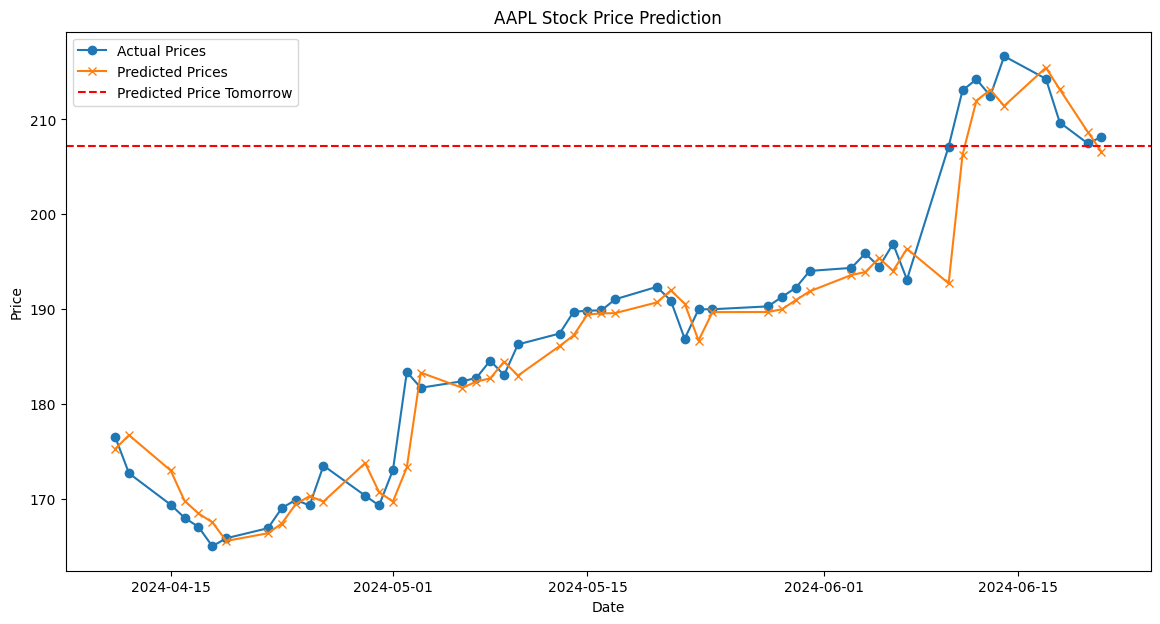

In [1]:
import yfinance as yf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Step 1: Retrieve historical AAPL stock data
ticker = 'AAPL'
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # 1 year of data
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Prepare the data (we'll use closing prices)
data['Prediction'] = data['Close'].shift(-1)
X = np.array(data['Close'][:-1]).reshape(-1, 1)
y = np.array(data['Prediction'][:-1])

# Step 3: Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 4: Train a simple model (e.g., linear regression)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)
predicted_price_tomorrow = model.predict(np.array(data['Close'][-1]).reshape(-1, 1))[0]

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Predicted price for tomorrow: {predicted_price_tomorrow}")

# Step 7: Visualization
plt.figure(figsize=(14, 7))
plt.plot(data.index[split_index:-1], y_test, label='Actual Prices', marker='o')
plt.plot(data.index[split_index:-1], y_pred, label='Predicted Prices', marker='x')
plt.axhline(y=predicted_price_tomorrow, color='r', linestyle='--', label='Predicted Price Tomorrow')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


#### Evaluate Model Performance Using Metrics Such as RMSE and MAE 

In [2]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Predicted price for tomorrow: {predicted_price_tomorrow}")

Mean Squared Error (MSE): 11.647824278531752
Root Mean Squared Error (RMSE): 3.4128908975429835
Mean Absolute Error (MAE): 2.3524622007669063
Predicted price for tomorrow: 207.22940653645531


#### Implemented the model to make real-time predictions based on historical stock data.

In [4]:
import time

def next_price_prediction(model, last_price):
    return model.predict(np.array(last_price).reshape(-1,1))[0]

# Real-time prediction loop with fixed numbers of iteration
iterations = 5

for _ in range(iterations):
    # Get latest stock data
    latest_data = yf.download(ticker, period='1d', interval='1m')
    latest_close_price = latest_data['Close'][-1]
    
    # Next price prediction
    tomorrow_price_prediction = next_price_prediction(model, latest_close_price)
    print("Predicted price for tomorrow:", tomorrow_price_prediction)
    
    # Sleep timer to specify interval of predictions
    time.sleep(60)
    
print('Real-time prediction completed.')

[*********************100%%**********************]  1 of 1 completed
C:\Users\emman\AppData\Local\Temp\ipykernel_13700\2335896518.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_close_price = latest_data['Close'][-1]


Predicted price for tomorrow: 207.23906098009815


[*********************100%%**********************]  1 of 1 completed
C:\Users\emman\AppData\Local\Temp\ipykernel_13700\2335896518.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_close_price = latest_data['Close'][-1]


Predicted price for tomorrow: 207.23906098009815


[*********************100%%**********************]  1 of 1 completed
C:\Users\emman\AppData\Local\Temp\ipykernel_13700\2335896518.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_close_price = latest_data['Close'][-1]


Predicted price for tomorrow: 207.23906098009815


[*********************100%%**********************]  1 of 1 completed
C:\Users\emman\AppData\Local\Temp\ipykernel_13700\2335896518.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_close_price = latest_data['Close'][-1]


Predicted price for tomorrow: 207.23906098009815


[*********************100%%**********************]  1 of 1 completed
C:\Users\emman\AppData\Local\Temp\ipykernel_13700\2335896518.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_close_price = latest_data['Close'][-1]


Predicted price for tomorrow: 207.23906098009815
Real-time prediction completed.
